In [93]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# housing = pd.read_csv('./housing_fill_drop1.csv', index_col=0)
# housing.shape
# housing 

In [14]:
pd.set_option('display.max_rows', housing.shape[0]+1)

housing.isna().sum()

PID               0
GrLivArea         0
SalePrice         0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType       14
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
BsmtFullBath      0
BsmtHalfBath      0


In [15]:
values = {'MasVnrType':'Missing', 'Electrical':'Missing'}

housing = housing.fillna(value=values)
housing.isnull().sum(axis=0)

PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr

In [16]:
housing['MSZoning'].dtypes

dtype('O')

In [17]:
housing.shape

(2580, 79)

In [18]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [19]:
# Dropping the columns
housing= housing.drop(["PID","BsmtHalfBath","HalfBath","KitchenAbvGr","BsmtFinSF2","BsmtUnfSF","GarageCars","WoodDeckSF",
                        "OpenPorchSF","EnclosedPorch", "3SsnPorch","ScreenPorch","OverallCond","MSSubClass",
                        "ExterCond" ,"Functional","BsmtCond","BsmtFinType1", "BsmtFinType2","GarageCond","GarageQual",
                         "RoofStyle","RoofMatl","Exterior2nd","MasVnrArea","Utilities","CentralAir",
                        "Fireplaces","PoolArea","Fence","MiscVal","Alley","LandContour",
                        "LotShape", "SaleCondition","SaleType","Condition2","MoSold"], axis=1)

In [20]:
housing.shape
housing.head()

GrLivArea  SalePrice MSZoning  LotFrontage  LotArea Street LotConfig  \
1        856     126000       RL         59.0     7890   Pave    Corner   
2       1049     139500       RL         42.0     4235   Pave    Inside   
3       1001     124900  C (all)         60.0     6060   Pave    Inside   
4       1039     114000       RL         80.0     8146   Pave    Corner   
5       1665     227000       RL         70.0     8400   Pave    Inside   

  LandSlope Neighborhood Condition1  ... BedroomAbvGr KitchenQual  \
1       Gtl        SWISU       Norm  ...            2          TA   
2       Gtl      Edwards       Norm  ...            2          Gd   
3       Gtl       IDOTRR       Norm  ...            2          Gd   
4       Gtl      OldTown       Norm  ...            2          TA   
5       Gtl       NWAmes       Norm  ...            3          Gd   

   TotRmsAbvGrd  FireplaceQu  GarageType GarageYrBlt GarageFinish GarageArea  \
1             4           Gd      Detchd      1939.0          Unf      399.0   
2             5          Nfp      Attchd      1984.0          Fin      266.0   
3             5          Nfp      Detchd      1930.0          Unf      216.0   
4             6          Nfp      Detchd      1940.0          Unf      281.0   
5             6          Nfp      Attchd      2001.0          Fin      528.0   

  PavedDrive YrSold  
1          Y   2010  
2          Y   2009  
3          N   2007  
4          N   2009  
5          Y   2009  

[5 rows x 41 columns]

In [22]:
# creating a dataframe of all non numerical/categorical columns.
housing_cat= housing.select_dtypes(include ='object')
housing_cat.shape

(2580, 22)

In [23]:
housing_cat.dtypes

MSZoning        object
Street          object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
BldgType        object
HouseStyle      object
Exterior1st     object
MasVnrType      object
ExterQual       object
Foundation      object
BsmtQual        object
BsmtExposure    object
Heating         object
HeatingQC       object
Electrical      object
KitchenQual     object
FireplaceQu     object
GarageType      object
GarageFinish    object
PavedDrive      object
dtype: object

In [28]:
housing.select_dtypes(exclude ='object')

GrLivArea  SalePrice  LotFrontage  LotArea  OverallQual  YearBuilt  \
1           856     126000         59.0     7890            6       1939   
2          1049     139500         42.0     4235            5       1984   
3          1001     124900         60.0     6060            5       1930   
4          1039     114000         80.0     8146            4       1900   
5          1665     227000         70.0     8400            8       2001   
6          1922     198500         64.0     7301            7       2003   
7           936      93000         60.0     6000            4       1953   
8          1246     187687         53.0     3710            7       2007   
9           889     137500         74.0    12395            5       1984   
10         1072     140000         35.0     3675            6       2005   
11         1342     219500         48.0     6240            8       2006   
12         1274     136000         63.0    10475            5       1991   
13          861      80000         62.0     7404            4       1920   
14         1394     159000         75.0     9500            6       1963   
15         1536     214000         70.0     9135            7       2002   
16         1680     163000         50.0     8480            6       1993   
17         1274     203000         68.0     8814            7       2005   
18          864      67000         45.0     8248            3       1914   
19         1610     205000         81.0    10603            6       1977   
20         1091     131250         62.0     7706            6       1993   
21         1486     181000         65.0     7441            7       2006   
22          789     115000         50.0     6000            5       1948   
23         1092      98000         21.0     1477            6       1970   
24         2640     265979         65.0    11700            7       1880   
25         1092     105500         21.0     1680            5       1971   
26         1458     168165         58.0    13204            7       2006   
27         1466     201000         73.0     8925            8       2007   
28         1573     177500         63.0     2117            6       2000   
29         2090     200000         81.0    10382            7       1973   
30         2046     450000        105.0    15431           10       2005   
31          886      91300         50.0     5784            5       1938   
32         1258     173500         64.0     7697            7       2007   
33         1324     199500        100.0    18494            6       2005   
34         1848     207000         64.0    13053            6       1923   
35         1269     155000         70.0     7931            5       1960   
36         1346     220000         88.0    11896            7       2008   
37         1749     196000         68.0     9272            7       1999   
38          492      61500         52.0     7830            3       1921   
39         2030     195000         81.0    12046            6       1976   
40          988     129250         65.0     7150            5       1966   
41         2172     291000         90.0    11000            9       2000   
42         1080     134000         71.0     9187            6       1983   
43         1312     186000         76.0    11355            7       1958   
44          925     133500         75.0     8638            5       1963   
45         1534     148000         60.0    10800            5       1895   
46         2376     325300        101.0    14215            8       2005   
47         1959     215000         59.0    11796            7       2004   
48         1716     131000         60.0    11409            5       1949   
49          936     109500         56.0     4485            5       1920   
50         1230     110000         60.0    10440            5       1910   
51         2592     150000         60.0    10890            5       1923   
52         1565     193800         32.0     3784      

In [29]:
# converting all categorical columns from object type to string in order to prep them for label encoding: 
housing_cat = housing_cat.astype(str)

In [32]:
# Label encoding all the categorical columns
labelencoder=LabelEncoder()
categorical = list(housing_cat.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    housing_cat[cat]=labelencoder.fit_transform(housing_cat[cat])
    

In [33]:
 housing_cat

MSZoning  Street  LotConfig  LandSlope  Neighborhood  Condition1  \
1            5       1          0          0            21           2   
2            5       1          4          0             7           2   
3            1       1          4          0            11           2   
4            5       1          0          0            20           2   
5            5       1          4          0            17           2   
6            5       1          0          0             7           2   
7            6       1          4          1            20           2   
8            5       1          4          0             0           2   
9            5       1          0          0            14           2   
10           6       1          4          0             7           2   
11           5       1          4          0            19           2   
12           5       1          4          0            14           2   
13           6       1          0          0            20           2   
14           5       1          4          0            15           2   
15           5       1          4          0             5           2   
16           5       1          4          0            23           2   
17           5       1          4          0             5           2   
18           5       1          4          0             7           2   
19           5       1          4          0            17           2   
20           5       1          4          0            14           2   
21           5       1          4          0            23           2   
22           6       1          4          0            20           2   
23           6       1          4          0            13           2   
24           6       1          0          0            20           2   
25           6       1          4          0             2           2   
26           5       1          4          0             8           6   
27           5       1          4          0            26           2   
28           2       1          4          0            24           2   
29           5       1          0          0            17           4   
30           5       1          4          0            19           2   
31           6       1          4          0            20           0   
32           5       1          4          0             8           2   
33           5       1          0          0             8           2   
34           5       1          4          0             3           2   
35           5       1          4          0            15           2   
36           5       1          0          0            26           2   
37           5       1          4          0             5           2   
38           6       1          4          0            20           2   
39           5       1          4          0            17           2   
40           5       1          4          0            15           2   
41           5       1          2          0            18           2   
42           5       1          0          0            14           2   
43           5       1          0          0            15           2   
44           5       1          4          0            22           5   
45           5       1          4          0            20           2   
46           5       1          0          0            19           2   
47           5       1          4          0             8           2   
48           5       1          4          0             7           2   
49           6       1          4          0            20           0   
50           6       1          0          0            20           2   
51           5       1          4          0            21           2   
52           2       1          4          0            24           2   
53           5       1          4          0            17           2   
54        

In [34]:
housing_cat.columns

Index(['MSZoning', 'Street', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive'],
      dtype='object')

In [35]:
# Dropping the original columns after encoding
housing= housing.drop(['MSZoning', 'Street', 'LotConfig', 'LandSlope', 'Neighborhood',
                   'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType',
                   'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating',
                   'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu',
                   'GarageType','GarageFinish','PavedDrive'], axis=1)

In [36]:
housing.head()

GrLivArea  SalePrice  LotFrontage  LotArea  OverallQual  YearBuilt  \
1        856     126000         59.0     7890            6       1939   
2       1049     139500         42.0     4235            5       1984   
3       1001     124900         60.0     6060            5       1930   
4       1039     114000         80.0     8146            4       1900   
5       1665     227000         70.0     8400            8       2001   

   YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1          1950       238.0        856.0       856         0             0   
2          1984       552.0       1049.0      1049         0             0   
3          2007       737.0        837.0      1001         0             0   
4          2003         0.0        405.0       717       322             0   
5          2001       643.0        810.0       810       855             0   

   BsmtFullBath  FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  \
1           1.0         1             2             4       1939.0   
2           1.0         2             2             5       1984.0   
3           0.0         1             2             5       1930.0   
4           0.0         1             2             6       1940.0   
5           1.0         2             3             6       2001.0   

   GarageArea  YrSold  
1       399.0    2010  
2       266.0    2009  
3       216.0    2007  
4       281.0    2009  
5       528.0    2009

In [37]:
# joining the numerical and encoded dataframe
housing_encoded= pd.concat([housing, housing_cat], axis=1)
housing_encoded.head()

GrLivArea  SalePrice  LotFrontage  LotArea  OverallQual  YearBuilt  \
1        856     126000         59.0     7890            6       1939   
2       1049     139500         42.0     4235            5       1984   
3       1001     124900         60.0     6060            5       1930   
4       1039     114000         80.0     8146            4       1900   
5       1665     227000         70.0     8400            8       2001   

   YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  ...  BsmtQual  \
1          1950       238.0        856.0       856  ...         5   
2          1984       552.0       1049.0      1049  ...         2   
3          2007       737.0        837.0      1001  ...         5   
4          2003         0.0        405.0       717  ...         1   
5          2001       643.0        810.0       810  ...         2   

   BsmtExposure  Heating  HeatingQC  Electrical  KitchenQual  FireplaceQu  \
1             4        1          4           4            4            2   
2             2        1          4           4            2            3   
3             4        1          0           4            2            3   
4             4        1          2           4            4            3   
5             4        1          0           4            2            3   

   GarageType  GarageFinish  PavedDrive  
1           5             3           2  
2           1             0           2  
3           5             3           0  
4           5             3           0  
5           1             0           2  

[5 rows x 41 columns]

In [38]:
housing_encoded.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'YrSold', 'MSZoning',
       'Street', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive'],
      dtype='object')

In [39]:
target = housing_encoded[['SalePrice']]
target.head()

SalePrice
1     126000
2     139500
3     124900
4     114000
5     227000

In [53]:
features = housing_encoded.drop(['SalePrice'], axis=1)
features.head()

GrLivArea  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1        856         59.0     7890            6       1939          1950   
2       1049         42.0     4235            5       1984          1984   
3       1001         60.0     6060            5       1930          2007   
4       1039         80.0     8146            4       1900          2003   
5       1665         70.0     8400            8       2001          2001   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  BsmtQual  BsmtExposure  \
1       238.0        856.0       856         0  ...         5             4   
2       552.0       1049.0      1049         0  ...         2             2   
3       737.0        837.0      1001         0  ...         5             4   
4         0.0        405.0       717       322  ...         1             4   
5       643.0        810.0       810       855  ...         2             4   

   Heating  HeatingQC  Electrical  KitchenQual  FireplaceQu  GarageType  \
1        1          4           4            4            2           5   
2        1          4           4            2            3           1   
3        1          0           4            2            3           5   
4        1          2           4            4            3           5   
5        1          0           4            2            3           1   

   GarageFinish  PavedDrive  
1             3           2  
2             0           2  
3             3           0  
4             3           0  
5             0           2  

[5 rows x 40 columns]

In [54]:
#Split the data set into two parts: training set and test set(with random_state=0, and test_size=0.3)

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.3)

In [67]:
# (1)
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()

# fit RF model on training set 
randomForest.set_params(random_state=0)
randomForest.fit(x_train, np.ravel(y_train)) 

RandomForestRegressor(random_state=0)

In [112]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [68]:
print("The training R2 is: %.5f" % (randomForest.score(x_train, y_train)))
print("The test R2 is: %.5f" % (randomForest.score(x_test, y_test)))

The training R2 is: 0.98261
The test R2 is: 0.90060


In [94]:
#Predicted Price from test dataset w.r.t Random Forest Regression
y_predict = randomForest.predict((x_test))

#Model Evaluation using R2 for Random Forest Regression
from sklearn import metrics
R2 = metrics.r2_score(y_test, y_predict)
print('R2 associated with Random Forest Regression is:', R2) 


R2 associated with Random Forest Regression is: 0.9005996864134261


In [89]:
list(range(2, 12, 3))

[2, 5, 8, 11]

In [95]:
# 1st GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth': list(range(2, 12, 3)), # 2 to the power of 12 = 4096 obs. We have 2580 obs. so we chose range of (2,12)
    'n_estimators': list(range(100, 500, 100)), # give enough range to move about to get a feel 
    'bootstrap':[True] # introduce extra random samples of dataset.  
}

In [98]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

C:\Users\oyb50\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 36.1 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [2, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True)

In [99]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 11, 'n_estimators': 100}

In [100]:
# get the best score
grid_search_forest.best_score_

0.8656783490575766

In [113]:
grid_search_forest.cv_results_

{'mean_fit_time': array([0.51075196, 1.02261224, 1.5168498 , 1.97410045, 0.9445467 ,
        1.8007062 , 2.71740222, 3.65103612, 1.37768393, 2.74670029,
        4.11250038, 5.45293489, 1.80437322, 3.61097279, 5.38372421,
        5.96682439]),
 'std_fit_time': array([0.00548838, 0.00829439, 0.01300665, 0.01463492, 0.02030957,
        0.00544389, 0.01642347, 0.02796059, 0.02019303, 0.0277713 ,
        0.0530376 , 0.01716325, 0.01499681, 0.01661114, 0.08494383,
        0.80938992]),
 'mean_score_time': array([0.01839504, 0.03066392, 0.04003291, 0.05378799, 0.01906366,
        0.03229632, 0.0425097 , 0.05905523, 0.02279372, 0.03826423,
        0.0499939 , 0.06423063, 0.023487  , 0.03820505, 0.05418663,
        0.04588718]),
 'std_score_time': array([0.00315592, 0.00309624, 0.00237945, 0.00478043, 0.00147155,
        0.00430819, 0.00317648, 0.00332507, 0.00369062, 0.00149846,
        0.00167861, 0.00245622, 0.00415774, 0.00251817, 0.00483211,
        0.01021698]),
 'param_bootstrap': masked

In [101]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.97911
The R2 test     is: 0.90074


In [102]:
# (3)What's the first 5 important features? Again please plot the sorted feature scores by barh
tree_final = grid_search_forest.best_estimator_
feature_importance = list(zip(x_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('OverallQual', 0.5468091720667759),
 ('GrLivArea', 0.12679278010108544),
 ('1stFlrSF', 0.06790566628191028),
 ('TotalBsmtSF', 0.04840415808493176),
 ('BsmtFinSF1', 0.03967816143567385),
 ('GarageArea', 0.026517445746537874),
 ('YearBuilt', 0.019823884856721548),
 ('FullBath', 0.016685349369554646),
 ('LotArea', 0.014961057119222996),
 ('YearRemodAdd', 0.010291360381256477),
 ('2ndFlrSF', 0.010043559291817028),
 ('Neighborhood', 0.007784509447951504),
 ('GarageYrBlt', 0.007206601917791932),
 ('ExterQual', 0.007075868587367497),
 ('LotFrontage', 0.006728795621882928),
 ('GarageType', 0.0038191188048425895),
 ('KitchenQual', 0.0037904345193320085),
 ('TotRmsAbvGrd', 0.003769317710392342),
 ('BsmtQual', 0.0031544317397455128),
 ('BsmtFullBath', 0.0031281537581778706),
 ('BsmtExposure', 0.00271609572713231),
 ('Exterior1st', 0.0024691287219001995),
 ('MSZoning', 0.0023265811177030486),
 ('YrSold', 0.002109992965992162),
 ('BedroomAbvGr', 0.002102351265987928),
 ('FireplaceQu', 0.001903575

<BarContainer object of 40 artists>

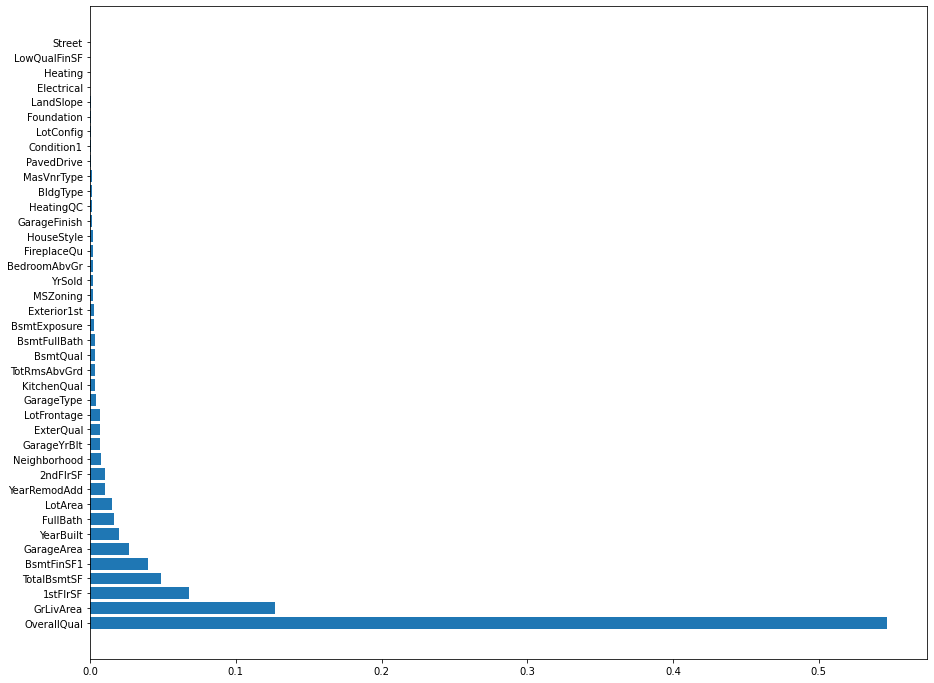

In [111]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [122]:
# 2nd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [2, 12, 25, 37 ,50], #use min_samples_split instead of setting value to max_depth 
    'n_estimators': [100], # 1st GridSearch best_param gave 'n_estimators': 100 so we leave it as is.  
    'bootstrap':[True],
    'max_features': [2,6,15,30]   #changed from default of 40 in 1st GridSearch to this.  
}

# use min_samples_split instead of setting value to max_depth. Because 1st GridSearch best_param for max_depth = 11. 
# no need to venture further than 11 because our # of observation is 2580 (2 to the power of (11-12))

In [116]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 16.4 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [2, 6, 15, 30],
                         'min_samples_split': [2, 12, 25, 37, 50],
                         'n_estimators': [100]},
             return_train_score=True)

In [117]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 15,
 'min_samples_split': 12,
 'n_estimators': 100}

In [118]:
# get the best score
grid_search_forest.best_score_

0.8719915715143862

In [119]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95597
The R2 test     is: 0.90067


In [123]:
# 3rd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [12], 
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [10, 15, 20, 25] # 2nd GridSearch best_param was 15 so we want to explore more around 15.  [6,15,30]
}  

# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_features': 15,
#  'min_samples_split': 12, NEXT 
#  'n_estimators': 100}

In [124]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 6.88 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [10, 15, 20, 25],
                         'min_samples_split': [12], 'n_estimators': [100]},
             return_train_score=True)

In [125]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 12,
 'n_estimators': 100}

In [126]:
# get the best score
grid_search_forest.best_score_

0.8750249436087941

In [127]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95798
The R2 test     is: 0.90090


In [133]:
# 4th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [12], #min_samples_split': hover around here for next [2, 12, 25] 
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [18 ,20, 22] 
}  

In [134]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 2.91 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [18, 20, 22],
                         'min_samples_split': [12], 'n_estimators': [100]},
             return_train_score=True)

In [135]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 12,
 'n_estimators': 100}

In [136]:
# get the best score
grid_search_forest.best_score_

0.8750249436087941

In [137]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95798
The R2 test     is: 0.90090


In [146]:
# 5th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [7,12,17], #min_samples_split': hover around here for next [2, 12, 25].  14 is better than 12. 
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [20] 
}  

#The 5th GridSearch best_param for min_samples_split returned 14 resulted in better test R2.  so we want to go to 14 

In [147]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 2.78 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [20],
                         'min_samples_split': [10, 12, 14],
                         'n_estimators': [100]},
             return_train_score=True)

In [148]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 14,
 'n_estimators': 100}

In [149]:
# get the best score
grid_search_forest.best_score_

0.8758827545651771

In [150]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95349
The R2 test     is: 0.90177


In [154]:
# 6th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [13,14,15], #min_samples_split': hover around here for next [2, 12, 25].  14 is better than 12. 
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [20] 
}  

#The 5th GridSearch best_param for min_samples_split returned 14 resulted in better test R2.  so we want to go to 14 

In [155]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 2.45 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [20],
                         'min_samples_split': [13, 14, 15],
                         'n_estimators': [100]},
             return_train_score=True)

In [156]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 14,
 'n_estimators': 100}

In [157]:
# get the best score
grid_search_forest.best_score_

0.8758827545651771

In [158]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95349
The R2 test     is: 0.90177


In [159]:
# (3)What's the first 5 important features? Again please plot the sorted feature scores by barh
tree_final = grid_search_forest.best_estimator_
feature_importance = list(zip(x_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('OverallQual', 0.3326955644788916),
 ('GrLivArea', 0.14147487717140922),
 ('YearBuilt', 0.09541256838120242),
 ('TotalBsmtSF', 0.07262253881843181),
 ('ExterQual', 0.06666303092301434),
 ('1stFlrSF', 0.06359381045164242),
 ('GarageArea', 0.054715793698879224),
 ('BsmtFinSF1', 0.02749624610938122),
 ('FullBath', 0.020045470892887756),
 ('LotArea', 0.01616160183963916),
 ('GarageYrBlt', 0.0150339368489243),
 ('2ndFlrSF', 0.014243212188075713),
 ('BsmtQual', 0.01325254534272779),
 ('KitchenQual', 0.011707500503082108),
 ('YearRemodAdd', 0.008312976232966738),
 ('LotFrontage', 0.007680991848009141),
 ('GarageType', 0.006997526996626571),
 ('Neighborhood', 0.0056418697883810365),
 ('BsmtFullBath', 0.0037673180570501736),
 ('TotRmsAbvGrd', 0.003353635098255091),
 ('BedroomAbvGr', 0.0019145835104383041),
 ('Exterior1st', 0.0019033172950928912),
 ('BsmtExposure', 0.0017889057724744001),
 ('MSZoning', 0.001736639434169771),
 ('HouseStyle', 0.0015353378269393663),
 ('FireplaceQu', 0.0013860666

<BarContainer object of 40 artists>

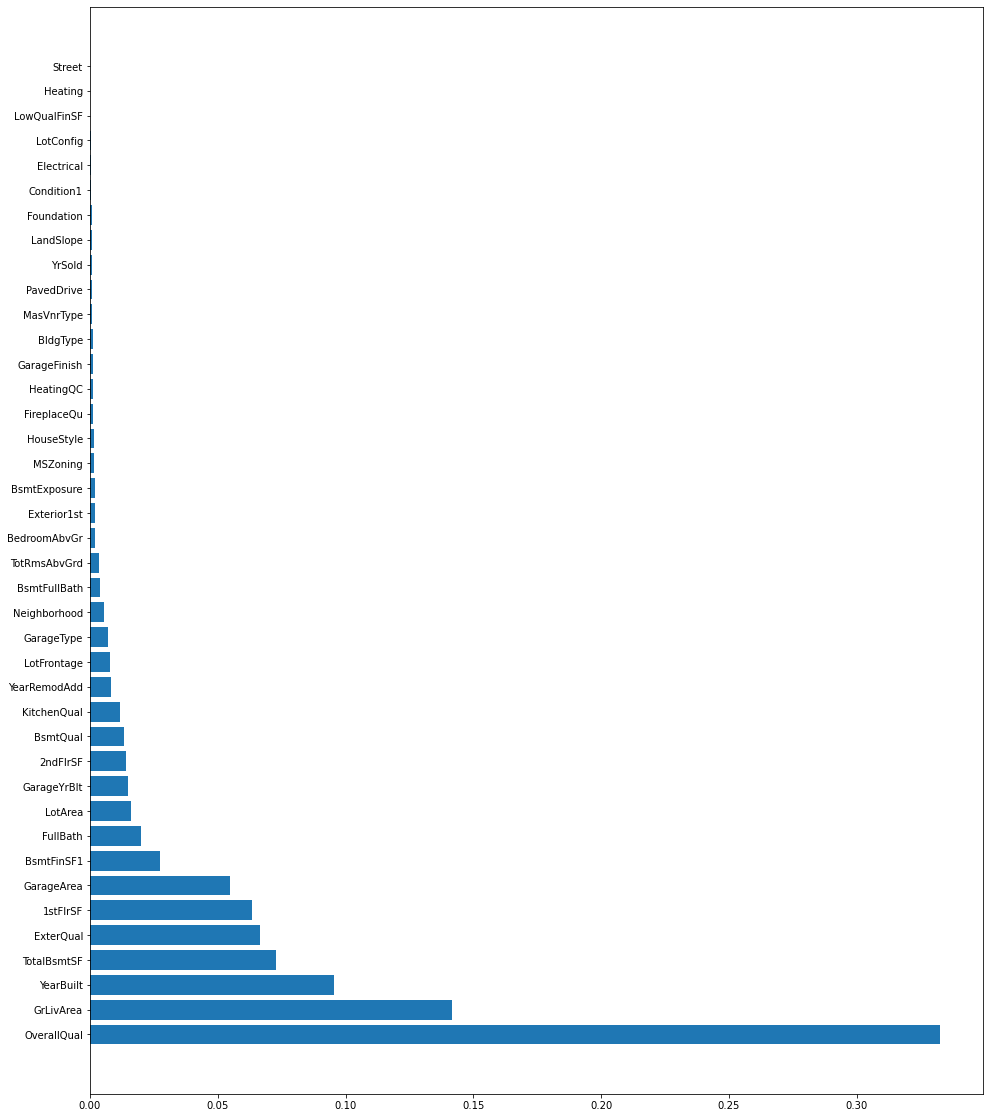

In [161]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

In [176]:
# features1 = features1.drop(['Condition1','Electrical','LotConfig','LowQualFinSF','Heating','Street'], axis=1) 
features1.shape

(2580, 34)

In [179]:
#Split the data set into two parts: training set and test set(with random_state=0, and test_size=0.3)

x_train, x_test, y_train, y_test = train_test_split(features1, target, random_state=0, test_size=0.3)

In [180]:
# (1)
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()

# fit RF model on training set 
randomForest.set_params(random_state=0)
randomForest.fit(x_train, np.ravel(y_train)) 

RandomForestRegressor(random_state=0)

In [181]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [182]:
print("The training R2 is: %.5f" % (randomForest.score(x_train, y_train)))
print("The test R2 is: %.5f" % (randomForest.score(x_test, y_test)))

The training R2 is: 0.98244
The test R2 is: 0.90016


In [183]:
# 1st GridSearch after Part 1 removal of features - Removed bottom 6 features
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth': list(range(2, 12, 3)), # 2 to the power of 12 = 4096 obs. We have 2580 obs. so we chose range of (2,12)
    'n_estimators': list(range(100, 500, 100)), # give enough range to move about to get a feel 
    'bootstrap':[True] # introduce extra random samples of dataset.  
}

In [184]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 36.5 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [2, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True)

In [185]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 11, 'n_estimators': 100}

In [186]:
# get the best score
grid_search_forest.best_score_

0.8648160689982676

In [187]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.97846
The R2 test     is: 0.90078


In [193]:
# 2nd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [2, 12, 25, 37 ,50], #use min_samples_split instead of setting value to max_depth 
    'n_estimators': [100], # 1st GridSearch best_param gave 'n_estimators': 100 so we leave it as is.  
    'bootstrap':[True],
    'max_features': [2,6,15,30]   #changed from default of 40 in 1st GridSearch to this.  
}

# use min_samples_split instead of setting value to max_depth. Because 1st GridSearch best_param for max_depth = 11. 
# no need to venture further than 11 because our # of observation is 2580 (2 to the power of (11-12))


In [194]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 15.7 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [2, 6, 15, 30],
                         'min_samples_split': [2, 12, 25, 37, 50],
                         'n_estimators': [100]},
             return_train_score=True)

In [195]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 15,
 'min_samples_split': 12,
 'n_estimators': 100}

In [196]:
# get the best score
grid_search_forest.best_score_

0.8732058256181009

In [197]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95680
The R2 test     is: 0.90446


In [198]:
# 3rd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [12], 
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [10, 15, 20, 25] # 2nd GridSearch best_param was 15 so we want to explore more around 15.  [6,15,30]
}  

# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_features': 15,
#  'min_samples_split': 12, NEXT 
#  'n_estimators': 100}

In [199]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 4.22 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [10, 15, 20, 25],
                         'min_samples_split': [12], 'n_estimators': [100]},
             return_train_score=True)

In [200]:
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 12,
 'n_estimators': 100}

In [ ]:
{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 12,
 'n_estimators': 100}

In [201]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95814
The R2 test     is: 0.90058


In [ ]:
The R2 training is: 0.95798
The R2 test     is: 0.90090